In [3]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [5]:
data_name = 'celebA_attrib'

In [6]:
query = f'''select label, count(img_dir) as count from DeepInSight.{data_name}_info group by label;'''

In [7]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [8]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')

In [9]:
df = df.sort_values(by='count',ascending=False)
df

,label,count
3,Facial_Features,453201
5,hair_style,270748
4,facial_hair,224256
0,accessory,196647
6,style,182223
2,face_type,161415
1,etc,10312


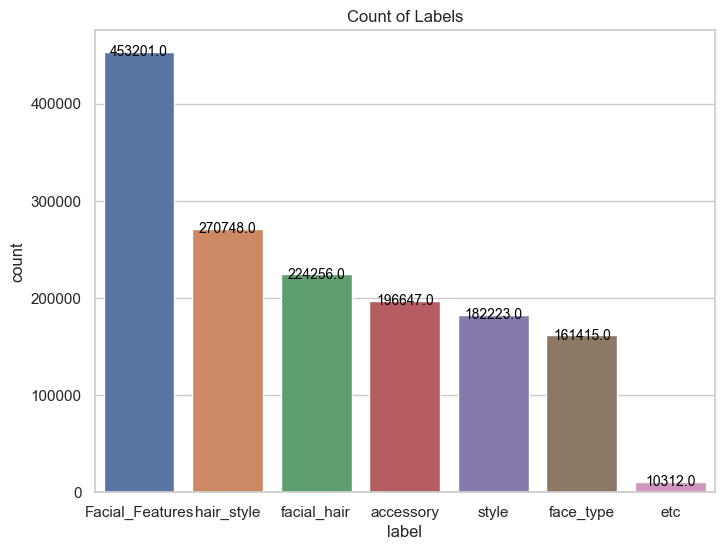

In [17]:
try:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='label', y='count', data=df, hue='label')
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('label')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)

In [11]:
query2 = f'''select label, value, count(img_dir) as count from DeepInSight.{data_name}_info group by label, value;'''

In [12]:
db = doUT.db
conn = doUT.conn
conn.execute(query2)
column_names = [desc[0] for desc in conn.description]
result2 = conn.fetchall()
db.commit()

In [13]:
df2 = pd.DataFrame(result2, columns=column_names)
df2['count'] = df2['count'].astype('int64')

In [14]:
df2 = df2.sort_values(by='label',ascending=True)
df2

,label,value,count
17,Facial_Features,High_Cheekbones,92189
20,Facial_Features,Smiling,97669
19,Facial_Features,Narrow_Eyes,23329
18,Facial_Features,Mouth_Slightly_Open,97942
16,Facial_Features,Chubby,11663
15,Facial_Features,Bushy_Eyebrows,28803
14,Facial_Features,Big_Nose,47516
13,Facial_Features,Arched_Eyebrows,54090
0,accessory,Eyeglasses,13193
5,accessory,Wearing_Necktie,14732


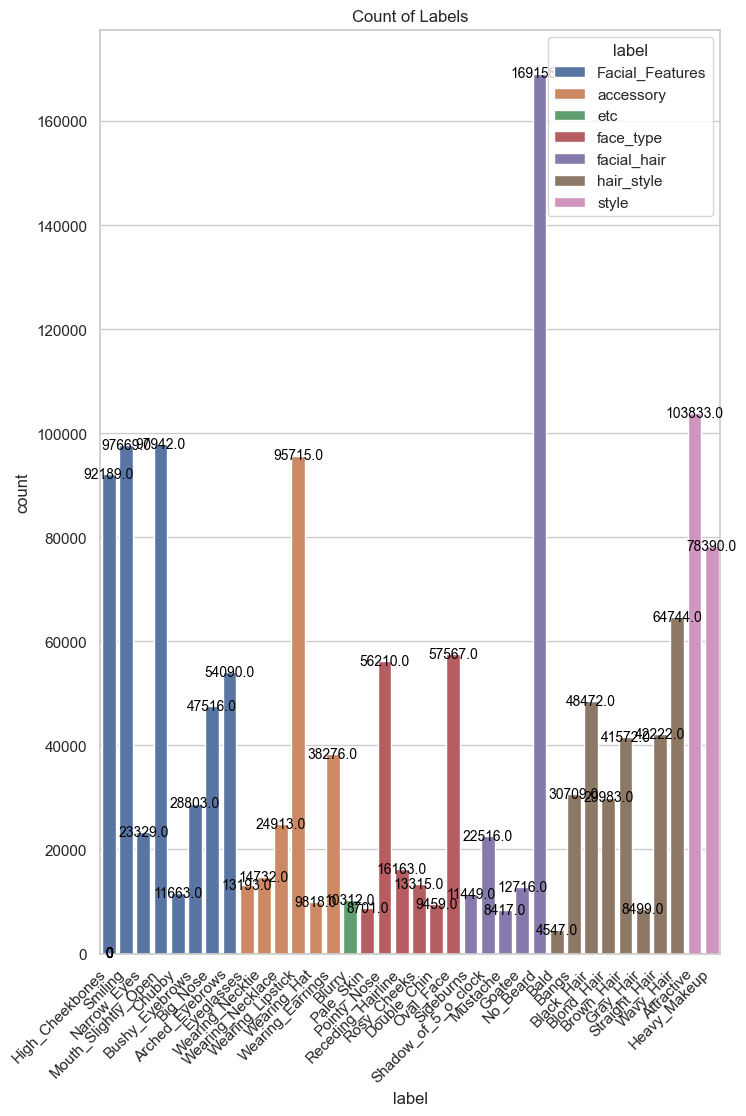

In [20]:
try:
    plt.figure(figsize=(8, 12))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='value', y='count', data=df2, hue='label')
    plt.xticks(rotation=45, ha='right')  # x 축 라벨들을 45도 기울임
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('label')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label2.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)